In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
def generateKeys(num_keys,max_key=10**5):
    keys = list(set(np.random.randint(0,max_key,num_keys)))
    return keys

In [4]:
class Edge:
    def __init__(self,start,end):
        self.start = start
        self.end = end
    def boundary(self):
        return[self.start, self.end]
    def sample(self,num_samples = 10):
        return np.linspace(0,1, num_samples)
    
def makeLineEdges(ordered_verts):
    edges = [Edge(start, end) for start, end in 
                 zip(ordered_verts[:-1],ordered_verts[1:])]
    return edges

def makeCircleEdges(ordered_verts):
    edges = [Edge(start, end) for start, end in 
                 zip(ordered_verts[:-1],ordered_verts[1:])]
    edges.append(Edge(ordered_verts[-1],ordered_verts[0]))
    return edges



In [5]:
# This is only about making K
num_verts = 4
verts = generateKeys(num_verts)
edges = makeCircleEdges(verts)

K = {'verts':verts, 'edges':edges}
# This is only about making section \sigma K -> F
angle_samps = np.linspace(0, 2*np.pi, num_verts+1)
vert_table = [(vert,np.cos(angle),np.sin(angle)) for vert, angle in zip(verts,angle_samps)]

    
# We need to build a utility function for our function data
def arc_data_row(alphas, start_angle = 0, end_angle = 2*np.pi):
    angles = (alphas*(end_angle-start_angle)) + start_angle
    fiber_values = {'temp':np.cos(angles), 'pressure':np.sin(angles),'angle':angles}
    return fiber_values


edge_table = [(edge, 
    lambda alphas,start_angle=start_angle,end_angle=end_angle: arc_data_row(alphas, start_angle=start_angle, end_angle=end_angle)) 
              for edge, start_angle, end_angle in zip(edges, angle_samps[:-1], angle_samps[1:])]


def vert_sigma(vert):
    for row in vert_table:
        if row[0] == vert:
            return row[1], row[2]

def edge_sigma(edge):
    for row in edge_table:
        if row[0] == edge:
            return row[1]    

sigma = {'K':K, 'vert_sigma':vert_sigma, 'edge_sigma':edge_sigma}

In [14]:
edge_table[0]

(<__main__.Edge at 0x1a3d8404dc0>,
 <function __main__.<listcomp>.<lambda>(alphas, start_angle=0.0, end_angle=1.5707963267948966)>)

In [11]:
edges

In [17]:
def transform_fiber(fiber_dict):
    
    return visual_dict

def plot_edge(edge, edge_function, ax, num_samples=None):
    if num_samples == None:
        ordered_samples = edge_function(edge.sample())
        xsamples = ordered_samples['temp']
        ysamples = ordered_samples['pressure']
        ax.plot(xsamples,ysamples)


edge: 2095318344272, start_vert: 38264, end_vert: 68209, start_x: [1.] start_y: [0.] start_y: [0.]
edge: 2095318344320, start_vert: 68209, end_vert: 48340, start_x: [6.123234e-17] start_y: [1.] start_y: [1.57079633]
edge: 2095318344560, start_vert: 48340, end_vert: 2312, start_x: [-1.] start_y: [1.2246468e-16] start_y: [3.14159265]
edge: 2095318344224, start_vert: 2312, end_vert: 38264, start_x: [-1.8369702e-16] start_y: [-1.] start_y: [4.71238898]


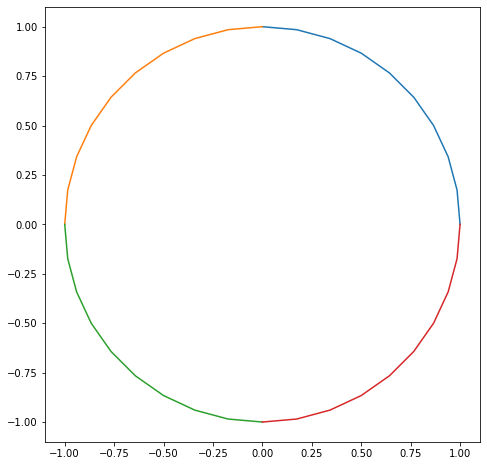

In [18]:
fig, ax = plt.subplots(1,figsize=(8,8))
ax.set_aspect(1)
for edge in sigma['K']['edges']:
    print(f'edge: {id(edge)}, start_vert: {edge.start}, end_vert: {edge.end},' +
          f' start_x: {edge_sigma(edge)(np.array([0]))["temp"]}' +
          f' start_y: {edge_sigma(edge)(np.array([0]))["pressure"]}' +
          f' start_y: {edge_sigma(edge)(np.array([0]))["angle"]}'
         )
    plot_edge(edge, edge_sigma(edge), ax)


In [19]:
edge_sigma(edge)(np.array([0]))

{'temp': array([-1.8369702e-16]),
 'pressure': array([-1.]),
 'angle': array([4.71238898])}